In [1]:
import os
import torch
from LatentPixel import LatentGPT2, LPixelForMLM, TGraph, LPixelForClassification, Discriminator, DiscriminatorConfig
from LatentPixel.metrics import Metric
from LatentPixel.training import ExpConfig
from LatentPixel import get_glue_dataset, GLUE_META
from LatentPixel import RenderConfig
from dataclasses import dataclass, field, asdict
from collections import defaultdict
from train import get_config
from sklearn.metrics import matthews_corrcoef
from tqdm import tqdm

_ = TGraph.init_render(dpi=180, pixels_per_patch=24)
text = 'Alice was everywhere, until she wasn’t. Just like at first, she was nowhere until she was. The absence of her before I knew she existed, was nothing. Now, the absence of her shrouds everything. Like a guest who never came to dinner; a stormy sky that didn’t deliver. Nothing can wash away the void where she used to be. This is what I’m thinking about the first time I take The Walk without her. I met Alice at a dinner party, the raucous kind with wild guests, beautiful people glittering in late summer air on a second-floor balcony backlit by a September sky. We were all friends of Richard, and this was his brilliant attempt to make all the people I love come together. Or it was a lavish birthday party thrown for himself. You could never quite tell with Richard. He was my hairdresser, but I was included among the people he loved the most, and so was Alice. From across the table, her eyes kept locking mine with interest: hers large and dark and layered with mischief. Her husband was older, serene. A balm to her boisterousness.'
story = 'This is a story about a knight who'

In [6]:
n = torch.tensor([1])

In [7]:
nn = torch.cat([n, n, n])

In [9]:
nn.max()

tensor(1)

In [4]:
qqp0 = get_glue_dataset(
    'qqp', 
    None,
    6, 
    6,
    42,
    RenderConfig(),
    0,
    16
)
qqp1 = get_glue_dataset(
    'qqp', 
    None,
    6, 
    6,
    42,
    RenderConfig(),
    15,
    16
)

Begin to load data for <qqp> task at rank 0


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qqp/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qqp loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qqp/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qqp loaded
1 validation sets in total
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloaders prepared
2 metrics will be used
['Accuracy', 'F1']
Begin to load data for <qqp> task at rank 15


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qqp/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qqp loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qqp/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qqp loaded
1 validation sets in total
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloaders prepared
2 metrics will be used
['Accuracy', 'F1']


In [9]:
print(len(qqp0[0]))
print(len(qqp1[0]))

3791
3790


In [10]:
print(len(qqp0[1][0]))
print(len(qqp1[1][0]))

422
421


In [11]:
model = LatentGPT2(
    coder_path=None,
    backbone_path='storage/checkpoints/24D_gpt2_2_gan_/lpixel_pretrain/LatentGPT2/20230816-030123/30000/backbone',
    img_size=(3, 24, 24*529),
    latent_size=(3, 24, 24*529)
)

Coder path is none, do not load coder for this model


Some weights of GPT2ForPatchCausalInference were not initialized from the model checkpoint at storage/checkpoints/24D_gpt2_2_gan_/lpixel_pretrain/LatentGPT2/20230816-030123/30000/backbone and are newly initialized: ['wte.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
real = TGraph.from_text([text, story])

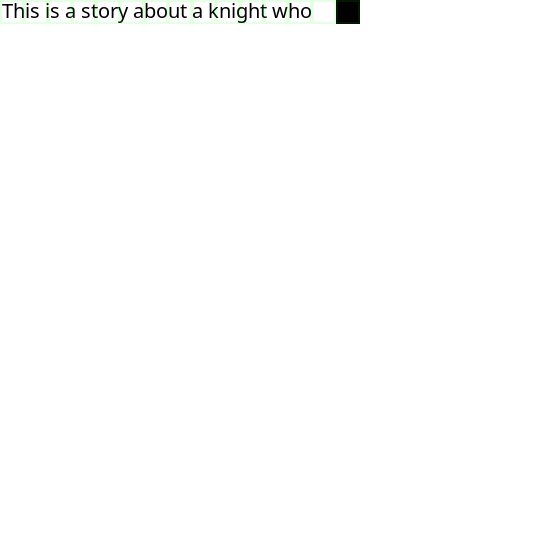

In [22]:
real.circle_mask(mask=real.attention_mask)
real.squarelize().to_PIL()[1]

In [27]:
with torch.no_grad():
    gen = model.autoregressive_generate(real, 13, 100)

generate the 0 th patch
generate the 1 th patch
generate the 2 th patch


generate the 3 th patch
generate the 4 th patch
generate the 5 th patch
generate the 6 th patch
generate the 7 th patch
generate the 8 th patch
generate the 9 th patch
generate the 10 th patch
generate the 11 th patch
generate the 12 th patch
generate the 13 th patch
generate the 14 th patch
generate the 15 th patch
generate the 16 th patch
generate the 17 th patch
generate the 18 th patch
generate the 19 th patch
generate the 20 th patch
generate the 21 th patch
generate the 22 th patch
generate the 23 th patch
generate the 24 th patch
generate the 25 th patch
generate the 26 th patch
generate the 27 th patch
generate the 28 th patch
generate the 29 th patch
generate the 30 th patch
generate the 31 th patch
generate the 32 th patch
generate the 33 th patch
generate the 34 th patch
generate the 35 th patch
generate the 36 th patch
generate the 37 th patch
generate the 38 th patch
generate the 39 th patch
generate the 40 th patch
generate the 41 th patch
generate the 42 th patch
generat

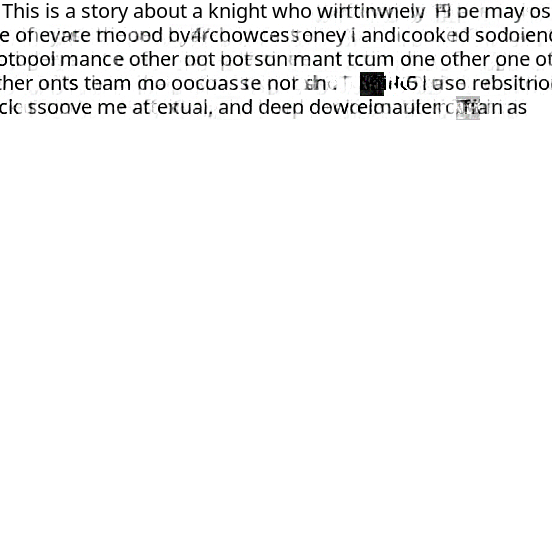

In [28]:
gen.squarelize().to_PIL()[1]

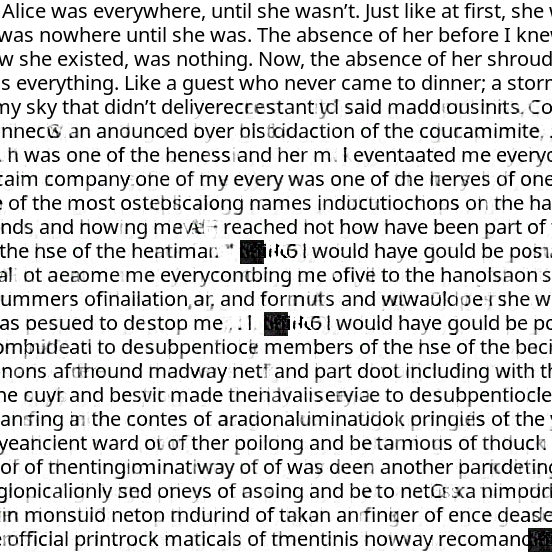

In [18]:
real.squarelize().to_PIL()[0]

In [32]:
x = TGraph.from_text([text, text + text, text])
attn_mask = x.attention_mask
text_mask = x.text_mask

In [34]:
attn_mask.sum(-1)

tensor([396., 529., 396.])

In [33]:
(attn_mask[0] != text_mask[0]).int()

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [60]:
ind = (mask.sum(-1) - 1).type(torch.long)

In [71]:
for idx, pos in enumerate(ind):
    mask[idx, pos] = 0

In [83]:
mask.T[ind, [0, 1, 2]] = 0

In [76]:
mask[0, 390]

tensor(1.)

In [13]:
labels = torch.ones(r.shape[:-1], dtype=torch.long)

In [22]:
labels.flatten().shape

torch.Size([1587])

In [26]:
r.flatten(0, 1).shape

torch.Size([1587, 2])

In [27]:
lossfn = torch.nn.CrossEntropyLoss(reduction='none')
loss = lossfn(r.flatten(0, 1), labels.flatten())

In [28]:
loss

tensor([0.3942, 0.3949, 0.2988,  ..., 0.3943, 0.4016, 0.3515],
       grad_fn=<NllLossBackward0>)

In [32]:
loss * mask.flatten()

tensor([0.3942, 0.3949, 0.2988,  ..., 0.0000, 0.0000, 0.0000],
       grad_fn=<MulBackward0>)

In [37]:
gpt2 = LatentGPT2(
    coder_path=None,
    backbone_path='storage/checkpoints/24D_gpt2_2/lpixel_pretrain/LatentGPT2/20230810-204348/100000/backbone',
    img_size=(3, 24, 24*529)
)

Coder path is none, do not load coder for this model


Some weights of GPT2ForPatchCausalInference were not initialized from the model checkpoint at storage/checkpoints/24D_gpt2_2/lpixel_pretrain/LatentGPT2/20230810-204348/100000/backbone and are newly initialized: ['wte.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
tin = TGraph.from_text([text])
with torch.no_grad():
    result = gpt2(tin)

In [40]:
result.to_PIL()[0]

In [44]:
result.circle_mask('green', alpha=0.2, mask=result.attention_mask, width=1)
result.to_file('gpt2result')

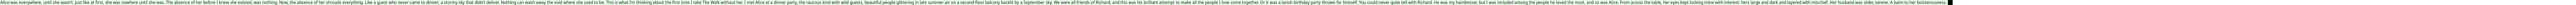

In [34]:
tgraph = TGraph.from_text(text)
# tgraph.paint_mask(color='black', alpha=0.7, mask=tgraph.patch_mask)
tgraph.circle_mask(color='green', alpha=0.3, mask=tgraph.attention_mask)
tgraph.to_PIL()

In [35]:
tgraph.to_file('long.png')

In [4]:
model = LPixelForMLM(
    coder_path='storage/SD2_VQGAN',
    backbone_path='storage/pixel-base',
    img_size=(3, 32, 32*529),
    latent_size=(4, 4, 4*529)
)
model.delete_unused_layers()

loading the coder from storage/SD2_VQGAN


Some weights of PIXELForPreTraining were not initialized from the model checkpoint at storage/pixel-base and are newly initialized because the shapes did not match:
- vit.embeddings.patch_embeddings.projection.weight: found shape torch.Size([768, 3, 16, 16]) in the checkpoint and torch.Size([768, 4, 4, 4]) in the model instantiated
- decoder.decoder_pred.weight: found shape torch.Size([768, 512]) in the checkpoint and torch.Size([64, 512]) in the model instantiated
- decoder.decoder_pred.bias: found shape torch.Size([768]) in the checkpoint and torch.Size([64]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


The decoder of the coder is deleted


In [3]:
train_loader, dev_loaders, metrics, _ = get_glue_dataset('wnli', config=None, sub_size=6, mp_workers=4, seed=42, render_config=RenderConfig(
    dpi=240,
    pixels_per_patch=32
))

Begin to load data for <wnli> task at rank 0


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/wnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for wnli loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/wnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for wnli loaded
1 validation sets in total
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloaders prepared
1 metrics will be used
['Accuracy']


In [4]:
bb = next(iter(train_loader))

pid 4070205's current affinity mask: 1000000001
pid 4070205's new affinity mask: ffffffffff
pid 4070080's current affinity mask: 1000000001
pid 4070080's new affinity mask: ffffffffff
pid 4070078's current affinity mask: 1000000001
pid 4070078's new affinity mask: ffffffffff
pid 4070079's current affinity mask: 1000000001
pid 4070079's new affinity mask: ffffffffff


In [5]:
with torch.no_grad():
    model(bb)

Coder exists, but no SD normalization
/work/sc118/sc118/yintaotai/miniconda3/envs/pt2hfpy310/lib/python3.10/site-packages/transformers/modeling_utils.py:884: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [46]:
bb.labels

tensor([0, 1, 1, 0, 0, 0])

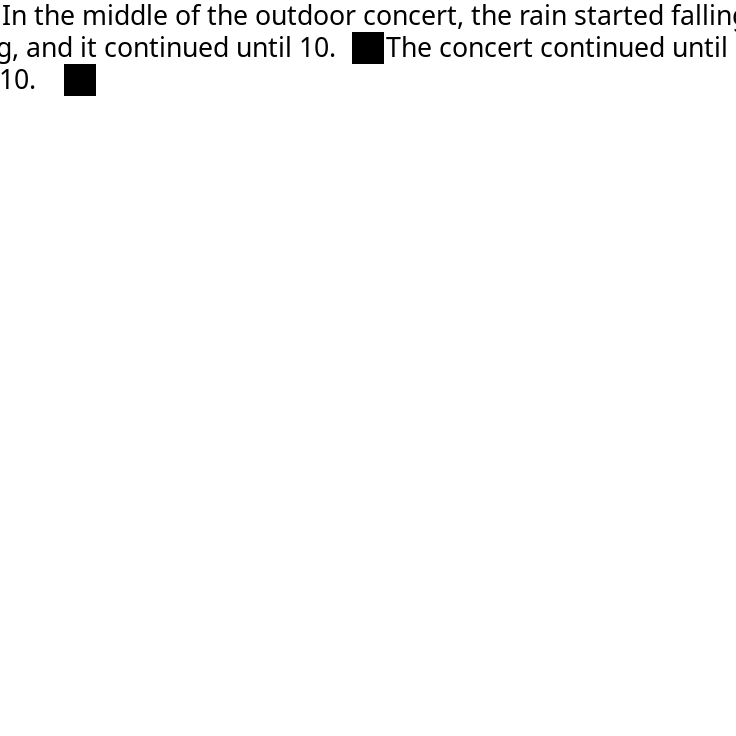

In [50]:
bb.squarelize().to_PIL()[4]

In [4]:
for d in dev_loaders[0]:
    print(d.value.shape)

pid 3262410's current affinity mask: 1000000001
pid 3262410's new affinity mask: ffffffffff
pid 3262537's current affinity mask: 1000000001
pid 3262537's new affinity mask: ffffffffff
pid 3262536's current affinity mask: 1000000001
pid 3262536's new affinity mask: ffffffffff
pid 3262473's current affinity mask: 1000000001
pid 3262473's new affinity mask: ffffffffff
torch.Size([6, 3, 32, 16928])
torch.Size([6, 3, 32, 16928])
torch.Size([5, 3, 32, 16928])


In [33]:
for rank in range(16):
    train_loader, dev_loaders, metrics, _ = get_glue_dataset('cola', config=None, sub_size=6, mp_workers=4, seed=42, render_config=RenderConfig(
        dpi=240,
        pixels_per_patch=32
    ), rank=rank, world_size=16)
    print(rank, len(dev_loaders[0]))
    print(rank, len(train_loader))

Begin to load data for <qnli> task at rank 0


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qnli loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qnli loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
0 57
0 1091
Begin to load data for <qnli> task at rank 1


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qnli loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qnli loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
1 57
1 1091
Begin to load data for <qnli> task at rank 2


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qnli loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qnli loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
2 57
2 1091
Begin to load data for <qnli> task at rank 3


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qnli loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qnli loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
3 57
3 1091
Begin to load data for <qnli> task at rank 4


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qnli loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qnli loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
4 57
4 1091
Begin to load data for <qnli> task at rank 5


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qnli loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qnli loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
5 57
5 1091
Begin to load data for <qnli> task at rank 6


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qnli loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qnli loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
6 57
6 1091
Begin to load data for <qnli> task at rank 7


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qnli loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qnli loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
7 56
7 1091
Begin to load data for <qnli> task at rank 8


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qnli loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qnli loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
8 56
8 1091
Begin to load data for <qnli> task at rank 9


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qnli loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qnli loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
9 56
9 1091
Begin to load data for <qnli> task at rank 10


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qnli loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qnli loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
10 56
10 1091
Begin to load data for <qnli> task at rank 11


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qnli loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qnli loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
11 56
11 1091
Begin to load data for <qnli> task at rank 12


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qnli loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qnli loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
12 56
12 1091
Begin to load data for <qnli> task at rank 13


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qnli loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qnli loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
13 56
13 1091
Begin to load data for <qnli> task at rank 14


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qnli loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qnli loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
14 56
14 1091
Begin to load data for <qnli> task at rank 15


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for qnli loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/qnli/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for qnli loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
15 56
15 1091


In [32]:
for rank in range(16):
    train_loader, dev_loaders, metrics, _ = get_glue_dataset('cola', config=None, sub_size=6, mp_workers=4, seed=42, render_config=RenderConfig(
        dpi=240,
        pixels_per_patch=32
    ), rank=rank, world_size=16)
    print(rank, len(dev_loaders[0]))
    print(rank, len(train_loader))

Begin to load data for <cola> task at rank 0


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for cola loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for cola loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
0 11
0 89
Begin to load data for <cola> task at rank 1


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for cola loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for cola loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
1 11
1 89
Begin to load data for <cola> task at rank 2


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for cola loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for cola loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
2 11
2 89
Begin to load data for <cola> task at rank 3


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for cola loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for cola loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
3 10
3 89
Begin to load data for <cola> task at rank 4


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for cola loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for cola loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
4 10
4 89
Begin to load data for <cola> task at rank 5


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for cola loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for cola loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
5 10
5 89
Begin to load data for <cola> task at rank 6


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for cola loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for cola loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
6 10
6 89
Begin to load data for <cola> task at rank 7


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for cola loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for cola loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
7 10
7 89
Begin to load data for <cola> task at rank 8


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for cola loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for cola loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
8 10
8 89
Begin to load data for <cola> task at rank 9


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for cola loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for cola loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
9 10
9 89
Begin to load data for <cola> task at rank 10


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for cola loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for cola loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
10 10
10 89
Begin to load data for <cola> task at rank 11


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for cola loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for cola loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
11 10
11 89
Begin to load data for <cola> task at rank 12


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for cola loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for cola loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
12 10
12 89
Begin to load data for <cola> task at rank 13


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for cola loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for cola loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
13 10
13 89
Begin to load data for <cola> task at rank 14


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for cola loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for cola loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
14 10
14 89
Begin to load data for <cola> task at rank 15


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for cola loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for cola loaded
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloader prepared
15 10
15 89


Begin to load data for <cola> task at rank 0


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Train dataset for cola loaded


Found cached dataset glue (/work/sc118/sc118/yintaotai/huggingface_cache/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


Validation dataset for cola loaded
1 validation sets in total
Train dataset splitted
Validation dataset splitted
Train dataloader prepared
Validation dataloaders prepared
1 metrics will be used
['Matthews_correlation']
pid 2722987's current affinity mask: 1000000001
pid 2722987's new affinity mask: ffffffffff
pid 2722988's current affinity mask: 1000000001
pid 2722988's new affinity mask: ffffffffff
pid 2722989's current affinity mask: 1000000001
pid 2722989's new affinity mask: ffffffffff
pid 2722990's current affinity mask: 1000000001
pid 2722990's new affinity mask: ffffffffff


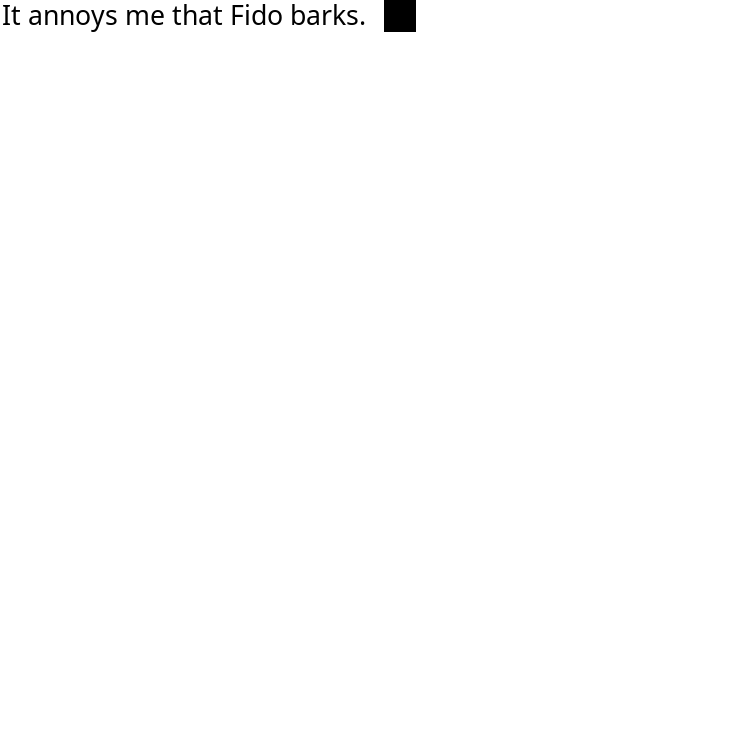

In [3]:
train_loader, dev_loaders, metrics, _ = get_glue_dataset('cola', config=None, sub_size=4, mp_workers=4, seed=42, render_config=RenderConfig(
    dpi=240,
    pixels_per_patch=32
), rank=0)
d = next(iter(dev_loaders[0]))
d.squarelize().to_PIL()[2]

In [7]:
model.delete_unused_layers()
model.eval()
model.latent_norm = False
labels = []
preds = []
with torch.no_grad():
    for batch in tqdm(dev_loaders[0]):
        labels += batch.labels.tolist()
        pred: TGraph = model(batch)
        preds += pred.predcits.tolist()

The decoder of the coder is deleted


  0%|          | 0/261 [00:00<?, ?it/s]

pid 2737213's current affinity mask: 1000000001
pid 2737213's new affinity mask: ffffffffff
pid 2737215's current affinity mask: 1000000001
pid 2737215's new affinity mask: ffffffffff
pid 2737214's current affinity mask: 1000000001
pid 2737214's new affinity mask: ffffffffff
pid 2737212's current affinity mask: 1000000001
pid 2737212's new affinity mask: ffffffffff


Coder exists, but no SD normalization
100%|██████████| 261/261 [39:00<00:00,  8.97s/it]


In [14]:
print(list(zip(preds, labels)))

[(0, 1), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (0, 1), (0, 0), (1, 1), (1, 1), (0, 1), (0, 0), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (1, 0), (1, 1), (0, 1), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (0, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 0), (1, 0), (1, 1), (1, 1), (1, 1), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 1), (1, 0), (0, 0), (0, 1), (1, 1), (1, 0), (1, 1), (0, 0), (1, 0), (0, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 0), (0, 0), (0, 0), (0, 1), (1, 1), (1, 1), (0, 1), (0, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 0), (0, 1), (1, 1), (1, 1), (1, 0), (1, 0), (0, 1), (1, 1), (1, 1), (0, 1), (1, 0), (1, 0), (0, 1), (0, 1), (0, 1), (1, 1),

In [15]:
results = list(zip(preds, labels))
c = 0
for a, b in results:
    if a == b:
        c += 1

print(c / len(results))

0.5877277085330777


In [12]:
pred.value.argmax(-1)

tensor([1, 1, 0])

In [13]:
num = 0
for b in dev_loaders[0]:
    num += b.value.shape[0]
print(num)

pid 570964's current affinity mask: 1000000001
pid 570964's new affinity mask: ffffffffff
pid 571027's current affinity mask: 1000000001
pid 571027's new affinity mask: ffffffffff
pid 571028's current affinity mask: 1000000001
pid 571028's new affinity mask: ffffffffff
pid 571132's current affinity mask: 1000000001
pid 571132's new affinity mask: ffffffffff
1040


In [11]:
mets = [met() for met in metrics]
for i in range(100):
    for met in mets:
        met: Metric
        d: TGraph
        met.accumulate(d.labels.tolist(), torch.zeros_like(d.labels).tolist())

In [12]:
len(mets[0].golden)

400

In [13]:
for met in mets:
    met: Metric
    print(met)
    print(type(met.result()))

METRIC[Pearson_correlation]: 0.0
<class 'float'>
METRIC[Spearman_correlation]: nan
<class 'float'>


/work/sc118/sc118/yintaotai/miniconda3/envs/pt2hfpy310/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [59]:
rs = [met.result() for met in mets]

In [62]:
type(rs[0])

float

In [20]:
matthews_corrcoef(met.golden, met.compare)

0.0

In [27]:
classifier = LPixelForClassification(
    coder_path='storage/SD2_VQGAN',
    backbone_path='storage/pixel-base/',
    img_size=(3, 16, 16*529),
    latent_size=(4, 2, 2*529),
    num_labels=1
)

loading the coder from storage/SD2_VQGAN


Some weights of the model checkpoint at storage/pixel-base/ were not used when initializing PIXELForSequenceClassification: ['decoder.decoder_layers.5.output.dense.bias', 'decoder.decoder_layers.3.output.dense.bias', 'decoder.decoder_layers.1.attention.attention.value.weight', 'decoder.decoder_layers.3.attention.attention.key.weight', 'decoder.decoder_layers.2.intermediate.dense.weight', 'decoder.decoder_layers.6.intermediate.dense.bias', 'decoder.decoder_layers.6.layernorm_after.weight', 'decoder.decoder_layers.7.attention.attention.query.bias', 'decoder.decoder_layers.5.attention.output.dense.weight', 'decoder.decoder_layers.2.layernorm_before.bias', 'decoder.decoder_layers.2.layernorm_after.bias', 'decoder.decoder_pred.bias', 'decoder.decoder_layers.4.attention.output.dense.bias', 'decoder.decoder_layers.7.layernorm_after.weight', 'decoder.decoder_layers.3.attention.attention.key.bias', 'decoder.decoder_layers.6.attention.attention.key.bias', 'decoder.decoder_layers.1.attention.atte

delete the decoder


In [28]:
classifier.backbone.classifier

Linear(in_features=768, out_features=1, bias=True)

In [17]:
model.delete_unused_layers()
model.latent_norm = False
with torch.no_grad():
    r = model(d.unsquarelize())

The decoder of the coder is deleted


/work/sc118/sc118/yintaotai/miniconda3/envs/pt2hfpy310/lib/python3.10/site-packages/transformers/modeling_utils.py:884: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [18]:
r.predcits

tensor([1, 0, 1, 1, 0, 1, 0, 0])

In [19]:
r.value

tensor([[-8.4145,  8.2769],
        [ 8.7234, -8.7577],
        [-9.0161,  8.8038],
        [-8.1626,  7.9692],
        [ 8.8196, -8.6836],
        [-8.8482,  8.6281],
        [ 8.8486, -8.7547],
        [ 7.6405, -7.5736]])

In [20]:
r.labels

tensor([1, 0, 1, 1, 0, 1, 0, 0])

In [14]:
gpt2 = LatentGPT2(
    backbone_path='storage/checkpoints/FHD_gpt2_2/lpixel_pretrain/LatentGPT2/20230803-210336/100000/backbone',
    img_size=[3, 12, 6348],
    latent_size=[3, 12, 6348]
)

Coder path is none, do not load coder for this model


Some weights of GPT2ForPatchCausalInference were not initialized from the model checkpoint at storage/checkpoints/FHD_gpt2_2/lpixel_pretrain/LatentGPT2/20230803-210336/100000/backbone and are newly initialized: ['wte.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [2]:
gpt2 = LatentGPT2(
    coder_path='storage/SD2_VQGAN',
    backbone_path='storage/checkpoints/FHL_gpt2_2/lpixel_pretrain/LatentGPT2/20230804-015607/100000/backbone',
    img_size=[3, 24, 24*529],
    latent_size=[4, 3, 3*529]
)

loading the coder from storage/SD2_VQGAN


Some weights of GPT2ForPatchCausalInference were not initialized from the model checkpoint at storage/checkpoints/FHL_gpt2_2/lpixel_pretrain/LatentGPT2/20230804-015607/100000/backbone and are newly initialized: ['wte.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [74]:
model = LPixelForClassification(
    backbone_path='storage/checkpoints/lpixel_pretrain2/lpixel_pretrain/LPixelForPreTraining/20230718-020315/99000/backbone',
    coder_path='storage/SD2_VQGAN',
    img_size=[3, 32, 32*529],
    latent_size=[4, 4, 4*529],
    num_labels=1
)

loading the coder from storage/SD2_VQGAN


Some weights of the model checkpoint at storage/checkpoints/lpixel_pretrain2/lpixel_pretrain/LPixelForPreTraining/20230718-020315/99000/backbone were not used when initializing PIXELForSequenceClassification: ['decoder.decoder_layers.3.attention.attention.key.bias', 'decoder.decoder_layers.2.attention.attention.value.bias', 'decoder.decoder_layers.5.layernorm_after.weight', 'decoder.decoder_layers.0.attention.attention.key.bias', 'decoder.decoder_layers.4.attention.attention.key.weight', 'decoder.decoder_layers.4.attention.attention.value.bias', 'decoder.decoder_layers.1.intermediate.dense.bias', 'decoder.decoder_layers.3.attention.attention.key.weight', 'decoder.decoder_layers.0.layernorm_before.weight', 'decoder.decoder_layers.6.layernorm_before.weight', 'decoder.decoder_norm.weight', 'decoder.decoder_layers.4.layernorm_after.bias', 'decoder.decoder_layers.6.layernorm_before.bias', 'decoder.decoder_layers.1.intermediate.dense.weight', 'decoder.decoder_layers.2.attention.attention.que

delete the decoder


In [5]:
model.latent_norm = False

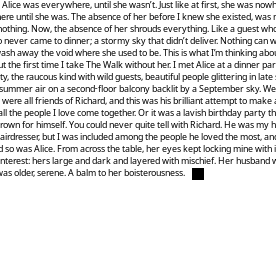

In [15]:
tin = TGraph.from_text([text])
tin.squarelize().to_PIL()[0]

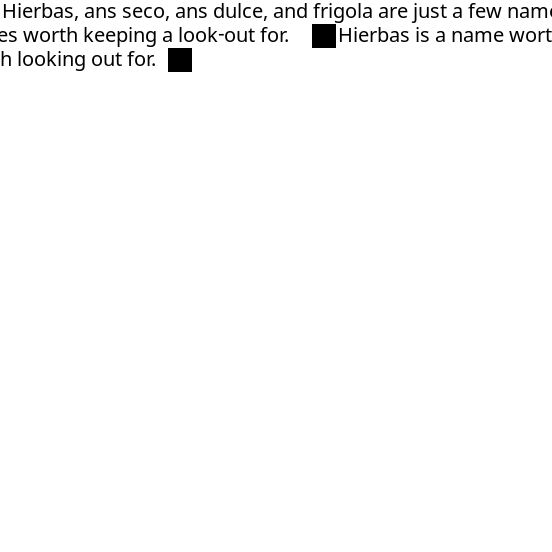

In [4]:
tp = TGraph.from_text(("Hierbas, ans seco, ans dulce, and frigola are just a few names worth keeping a look-out for.", "Hierbas is a name worth looking out for."))
tp.squarelize().to_PIL()

In [17]:
with torch.no_grad():
    result = gpt2(tin.unsquarelize())

In [11]:
result.attention_mask.shape

torch.Size([1, 529])

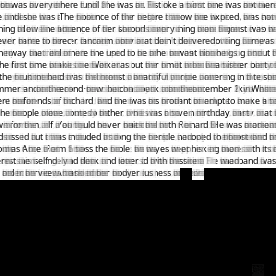

In [18]:
result.squarelize().to_PIL()[0]

In [30]:
with torch.no_grad():
    a = gpt2.decode(gpt2.encode(tin.unsquarelize())).squarelize().to_PIL()[0]

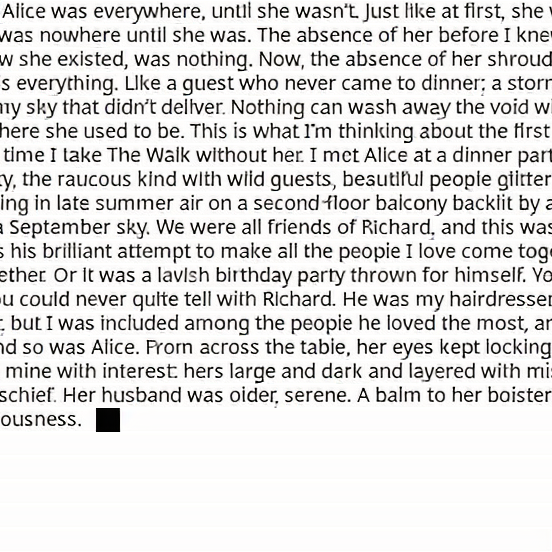

In [31]:
a

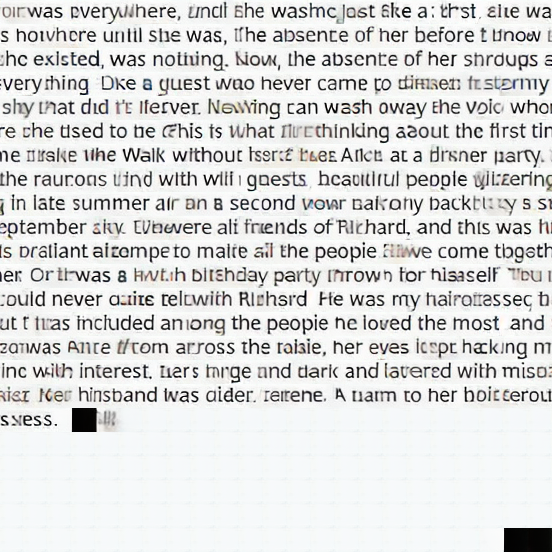

In [6]:
result.squarelize().to_PIL()[0]

In [16]:
with torch.no_grad():
    gen = gpt2.autoregressive_generate(tin.unsquarelize(), 99, 500)

generate the 0 th patch
generate the 1 th patch
generate the 2 th patch
generate the 3 th patch
generate the 4 th patch
generate the 5 th patch
generate the 6 th patch
generate the 7 th patch
generate the 8 th patch
generate the 9 th patch
generate the 10 th patch
generate the 11 th patch
generate the 12 th patch
generate the 13 th patch
generate the 14 th patch
generate the 15 th patch
generate the 16 th patch
generate the 17 th patch
generate the 18 th patch
generate the 19 th patch
generate the 20 th patch
generate the 21 th patch
generate the 22 th patch
generate the 23 th patch
generate the 24 th patch
generate the 25 th patch
generate the 26 th patch
generate the 27 th patch
generate the 28 th patch
generate the 29 th patch
generate the 30 th patch
generate the 31 th patch
generate the 32 th patch
generate the 33 th patch
generate the 34 th patch
generate the 35 th patch
generate the 36 th patch
generate the 37 th patch
generate the 38 th patch
generate the 39 th patch
generate t

In [18]:
gen = gpt2.decode(gen)

In [27]:
gen.init_patch_mask('at', 500, idx=99)
gen.circle_mask('red', 0.3)

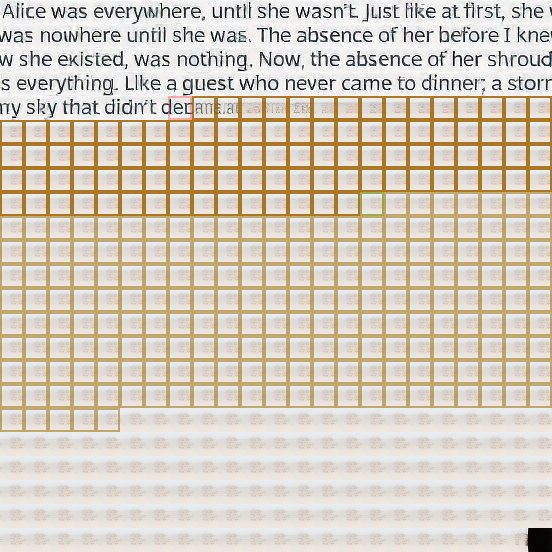

In [28]:
gen.squarelize().to_PIL()[0]

In [4]:
with torch.no_grad():
    result = model(tin.unsquarelize())

NameError: name 'model' is not defined

In [16]:
with torch.no_grad():
    encoded = model.encode(tin)
    encoded.patch_size = 4
    recon = model.latent_forward(encoded)
    inter = TGraph.reconstruct(encoded, recon)
    decoded = model.decode(inter)

/work/sc118/sc118/yintaotai/miniconda3/envs/pt2hfpy310/lib/python3.10/site-packages/transformers/modeling_utils.py:884: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


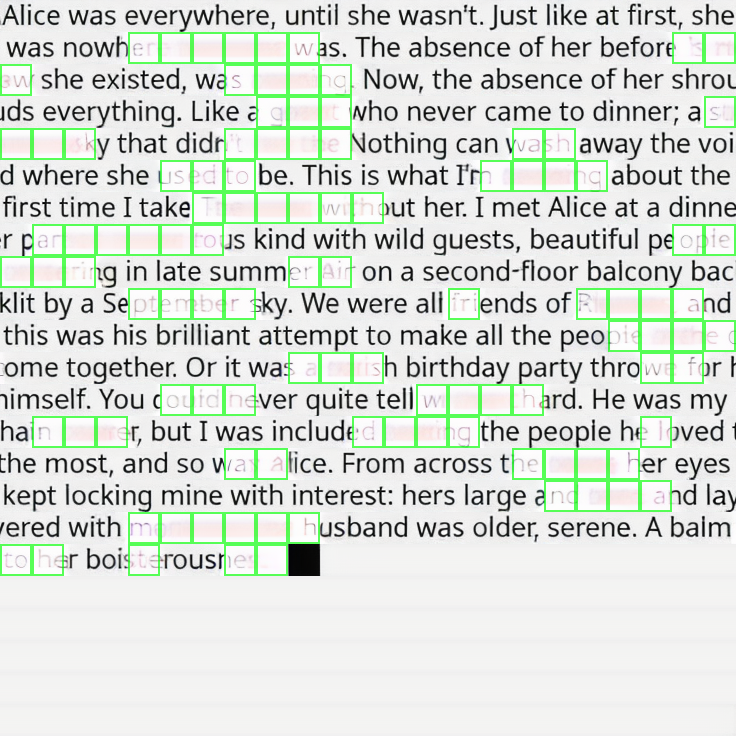

In [21]:
decoded.squarelize().to_PIL()[1]

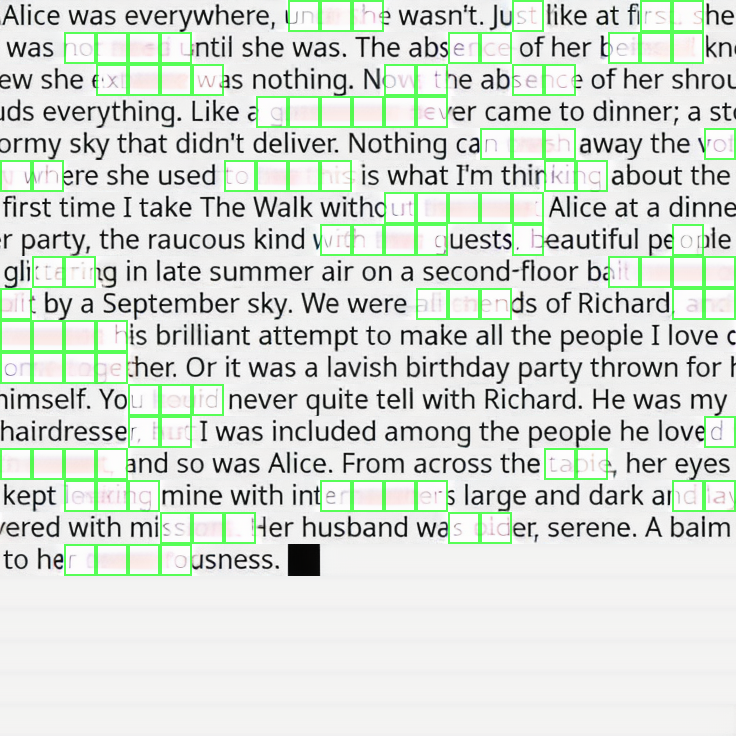

In [20]:
decoded.squarelize().to_PIL()[0]

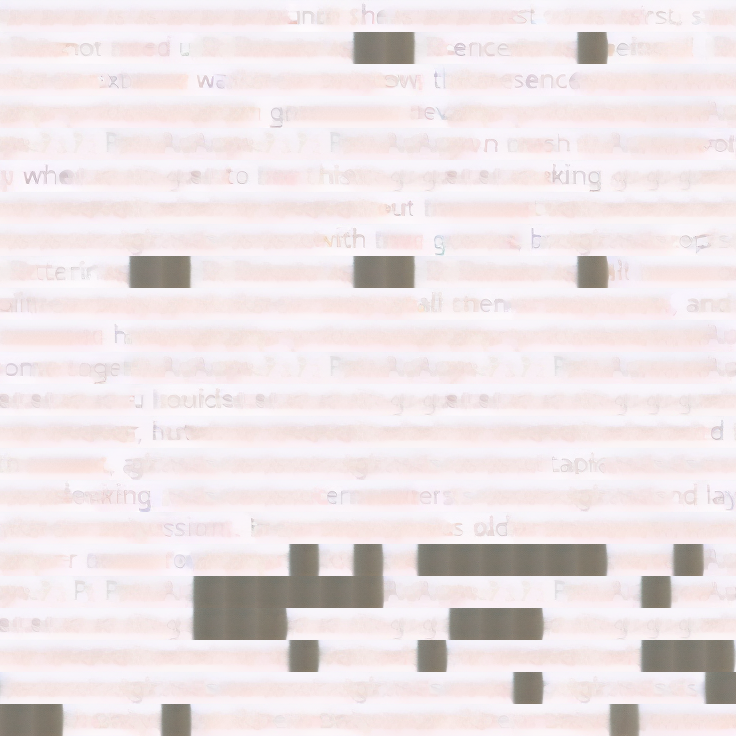

In [22]:
result: TGraph
result.squarelize().to_PIL()[0]

In [16]:
result.patch_mask[0]

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
        1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 